In [1]:
!conda env list 

# conda environments:
#
base                     C:\ProgramData\Anaconda3
darts                    C:\Users\selim\.conda\envs\darts
env1                     C:\Users\selim\.conda\envs\env1
final_env             *  C:\Users\selim\.conda\envs\final_env
forcast                  C:\Users\selim\.conda\envs\forcast
forcasting               C:\Users\selim\.conda\envs\forcasting



In [2]:
conda list 

# packages in environment at C:\Users\selim\.conda\envs\final_env:
#
# Name                    Version                   Build  Channel
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py37h2bbff1b_0  
attrs                     21.4.0             pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.11.1           py37haa95532_0  
bleach                    4.1.0              pyhd3eb1b0_0  
ca-certificates           2022.4.26            haa95532_0  
certifi                   2022.5.18.1      py37haa95532_0  
cffi                      1.15.0           py37h2bbff1b_1  
colorama                  0.4.4              pyhd3eb1b0_0  
debugpy                   1.5.1            py37hd77b12b_0  
decorator                 5.1.1              pyhd3eb1b0_0  
defusedxml                0.7.1              pyhd3eb1b0_0  
entrypoints               0.4              py37haa95532_0  
importlib-metadata      

In [48]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.datasets import AirPassengersDataset

In [82]:
x = data.iloc[0].date
a = x.strftime('%Y-%m-%d')


data['final_date'] = data.date.apply(lambda x :dt.datetime.strptime(x.strftime('%Y-%m-%d') , '%Y-%m-%d')  )


,date,value,final_date
0,2022-05-08 22:11:14.955,824664064,2022-05-08
1,2022-05-09 19:22:14.982,922943488,2022-05-09
2,2022-05-11 00:11:27.482,937984000,2022-05-11
3,2022-05-11 16:59:59.675,828063744,2022-05-11
4,2022-05-12 09:20:03.376,707219456,2022-05-12
5,2022-05-13 15:26:30.489,805883904,2022-05-13
6,2022-05-14 14:00:30.503,741416960,2022-05-14
7,2022-05-15 01:36:13.644,813064192,2022-05-15
8,2022-05-16 23:32:03.228,831332352,2022-05-16
9,2022-05-17 19:47:14.100,877137920,2022-05-17


In [85]:
data = data[['final_date' , 'value']]
data

,final_date,value
0,2022-05-08,824664064
1,2022-05-09,922943488
2,2022-05-11,937984000
3,2022-05-11,828063744
4,2022-05-12,707219456
5,2022-05-13,805883904
6,2022-05-14,741416960
7,2022-05-15,813064192
8,2022-05-16,831332352
9,2022-05-17,877137920


In [90]:
data = data[['final_date' , 'value']]
data
data = data.groupby('final_date').value.mean().reset_index()

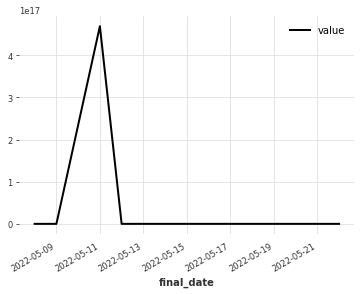

In [97]:
data = data[['final_date' , 'value']]
data
data = data.groupby('final_date').value.mean().reset_index()
from darts import TimeSeries
final_data = TimeSeries.from_dataframe(data, 'final_date',fill_missing_dates=True, freq='D')
from darts.utils.missing_values import fill_missing_values
series = fill_missing_values(final_data , fill = 'auto')
series.plot()


In [98]:
data

,final_date,value
0,2022-05-08,8.246641e+08
1,2022-05-09,9.229435e+08
2,2022-05-11,4.689920e+17
3,2022-05-12,7.072195e+08
4,2022-05-13,8.058839e+08
5,2022-05-14,7.414170e+08
6,2022-05-15,8.130642e+08
7,2022-05-16,8.313324e+08
8,2022-05-17,8.771379e+08
9,2022-05-19,9.627648e+08


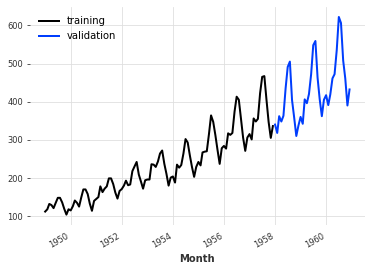

In [8]:
train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training")
val.plot(label="validation")

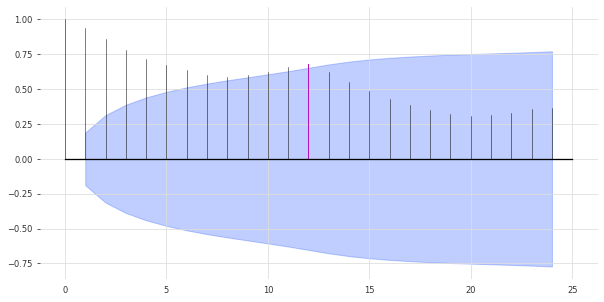

In [9]:


from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)

[2022-05-21 15:11:28,254] WARNING | darts.models | Support for AutoARIMA, BATS and TBATS is not available.To enable it, install u8darts[pmdarima] or u8darts[all].
2022-05-21 15:11:28 darts.models WARNING: Support for AutoARIMA, BATS and TBATS is not available.To enable it, install u8darts[pmdarima] or u8darts[all].
[2022-05-21 15:11:28,261] WARNING | darts.models | Support for Facebook Prophet is not available. To enable it, install "darts", "u8darts[prophet]" or "u8darts[all]" (with pip);or "u8darts-all" (with conda).
2022-05-21 15:11:28 darts.models WARNING: Support for Facebook Prophet is not available. To enable it, install "darts", "u8darts[prophet]" or "u8darts[all]" (with pip);or "u8darts-all" (with conda).
[2022-05-21 15:11:28,271] WARNING | darts.models | Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
2022-05-21 15:11:28 darts.models WARNING: Support

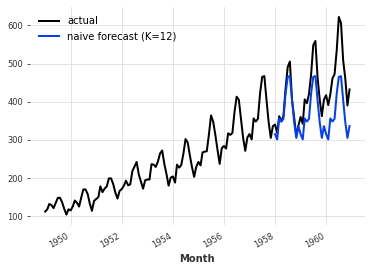

In [11]:


from darts.models import NaiveSeasonal

seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(36)

series.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=12)")

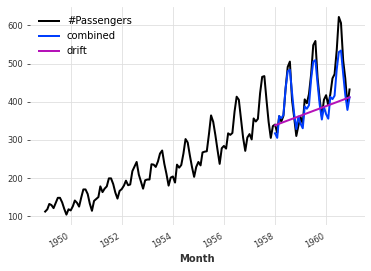

In [12]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(36)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

series.plot()
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift")

In [14]:
from darts.metrics import mape

print(
    "Mean absolute percentage error for the combined naive drift + seasonal: {:.2f}%.".format(
        mape(series, combined_forecast)
    )
)

Mean absolute percentage error for the combined naive drift + seasonal: 5.66%.


In [15]:


from darts.models import ExponentialSmoothing, Theta


def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))


eval_model(ExponentialSmoothing())

eval_model(Theta())

model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains MAPE: 5.11%
model Theta(2) obtains MAPE: 8.15%


In [16]:
## find best model parametrs

thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

In [17]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(val, pred_best_theta), best_theta
    )
)

The MAPE is: 4.40, with theta = -3.5102040816326543.


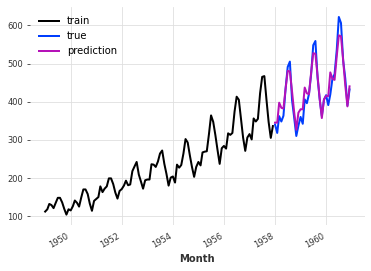

In [18]:
train.plot(label="train")
val.plot(label="true")
pred_best_theta.plot(label="prediction")

In [1]:
from prometheus_api_client import PrometheusConnect
prom = PrometheusConnect(url ="http://192.168.253.135:31539/", disable_ssl=True)
# Get the list of all the metrics that the Prometheus host scrapes
prom.all_metrics()

['aggregator_openapi_v2_regeneration_count',
 'aggregator_openapi_v2_regeneration_duration',
 'aggregator_unavailable_apiservice',
 'aggregator_unavailable_apiservice_total',
 'apiextensions_openapi_v2_regeneration_count',
 'apiserver_admission_controller_admission_duration_seconds_bucket',
 'apiserver_admission_controller_admission_duration_seconds_count',
 'apiserver_admission_controller_admission_duration_seconds_sum',
 'apiserver_admission_step_admission_duration_seconds_bucket',
 'apiserver_admission_step_admission_duration_seconds_count',
 'apiserver_admission_step_admission_duration_seconds_sum',
 'apiserver_admission_step_admission_duration_seconds_summary',
 'apiserver_admission_step_admission_duration_seconds_summary_count',
 'apiserver_admission_step_admission_duration_seconds_summary_sum',
 'apiserver_audit_event_total',
 'apiserver_audit_requests_rejected_total',
 'apiserver_client_certificate_expiration_seconds_bucket',
 'apiserver_client_certificate_expiration_seconds_co

In [38]:
from prometheus_api_client.utils import parse_datetime 
from prometheus_api_client import PrometheusConnect,  MetricSnapshotDataFrame, MetricRangeDataFrame

from datetime import timedelta

start_time = parse_datetime("5w")
end_time = parse_datetime("now")
chunk_size = timedelta(days=1)

metric_data = prom.get_metric_range_data(
    "node_memory_MemAvailable_bytes",  # this is the metric name and label config
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)

In [39]:
metric_df = MetricSnapshotDataFrame(metric_data)
metric_df.head()

,__name__,app,app_kubernetes_io_managed_by,chart,component,heritage,instance,job,namespace,node,release,service,timestamp,value
0,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652044e+09,824664064
1,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652121e+09,922943488
2,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652224e+09,937984000
3,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652285e+09,828063744
4,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652344e+09,707219456


In [40]:
metric_df.iloc[0]

__name__                        node_memory_MemAvailable_bytes
app                                                 prometheus
app_kubernetes_io_managed_by                              Helm
chart                                        prometheus-15.8.5
component                                        node-exporter
heritage                                                  Helm
instance                                  192.168.253.135:9100
job                               kubernetes-service-endpoints
namespace                                              default
node                                                    server
release                                             prometheus
service                               prometheus-node-exporter
timestamp                                       1652044274.955
value                                                824664064
Name: 0, dtype: object

In [41]:
import datetime as dt 
dt.datetime.fromtimestamp(1653073361.419)

datetime.datetime(2022, 5, 20, 20, 2, 41, 419000)

In [42]:
metric_df['date'] = metric_df.timestamp.apply(lambda x : dt.datetime.fromtimestamp(x))

In [43]:
metric_df

,__name__,app,app_kubernetes_io_managed_by,chart,component,heritage,instance,job,namespace,node,release,service,timestamp,value,date
0,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652044e+09,824664064,2022-05-08 22:11:14.955
1,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652121e+09,922943488,2022-05-09 19:22:14.982
2,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652224e+09,937984000,2022-05-11 00:11:27.482
3,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652285e+09,828063744,2022-05-11 16:59:59.675
4,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652344e+09,707219456,2022-05-12 09:20:03.376
5,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652452e+09,805883904,2022-05-13 15:26:30.489
6,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652533e+09,741416960,2022-05-14 14:00:30.503
7,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652575e+09,813064192,2022-05-15 01:36:13.644
8,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652740e+09,831332352,2022-05-16 23:32:03.228
9,node_memory_MemAvailable_bytes,prometheus,Helm,prometheus-15.8.5,node-exporter,Helm,192.168.253.135:9100,kubernetes-service-endpoints,default,server,prometheus,prometheus-node-exporter,1.652813e+09,877137920,2022-05-17 19:47:14.100


In [44]:
data = metric_df[['date' , 'value']]

In [46]:
data = data.sort_values(by = 'date')

In [47]:
series = data

In [50]:
series

,date,value
0,2022-05-08 22:11:14.955,824664064
1,2022-05-09 19:22:14.982,922943488
2,2022-05-11 00:11:27.482,937984000
3,2022-05-11 16:59:59.675,828063744
4,2022-05-12 09:20:03.376,707219456
5,2022-05-13 15:26:30.489,805883904
6,2022-05-14 14:00:30.503,741416960
7,2022-05-15 01:36:13.644,813064192
8,2022-05-16 23:32:03.228,831332352
9,2022-05-17 19:47:14.100,877137920


In [ ]:
#######################################################################################################""

In [142]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.datasets import AirPassengersDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
from prometheus_api_client import PrometheusConnect
prom = PrometheusConnect(url ="http://192.168.253.135:31539/", disable_ssl=True)
# Get the list of all the metrics that the Prometheus host scrapes
from prometheus_api_client.utils import parse_datetime 
from prometheus_api_client import PrometheusConnect,  MetricSnapshotDataFrame, MetricRangeDataFrame

from datetime import timedelta

start_time = parse_datetime("5w")
end_time = parse_datetime("now")
chunk_size = timedelta(days=1)
query= "node_memory_MemAvailable_bytes"
metric_data = prom.get_metric_range_data(
    query,  # this is the metric name and label config
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)

In [103]:
metric_df = MetricSnapshotDataFrame(metric_data)
metric_df.head()
metric_df['date'] = metric_df.timestamp.apply(lambda x : dt.datetime.fromtimestamp(x))
data = metric_df[['date' , 'value']]
data = data.sort_values(by = 'date')
data.head()

,date,value
0,2022-05-08 22:11:14.955,824664064
1,2022-05-09 19:22:14.982,922943488
2,2022-05-11 00:11:27.482,937984000
3,2022-05-11 16:59:59.675,828063744
4,2022-05-12 09:20:03.376,707219456


In [105]:
## cleean data with the value of available memory evry day and fill the missing data points
data['final_date'] = data.date.apply(lambda x :dt.datetime.strptime(x.strftime('%Y-%m-%d') , '%Y-%m-%d')  )
data = data[['final_date' , 'value']]
data = data.groupby('final_date').value.mean().reset_index()
data.head()

,final_date,value
0,2022-05-08,8.246641e+08
1,2022-05-09,9.229435e+08
2,2022-05-11,4.689920e+17
3,2022-05-12,7.072195e+08
4,2022-05-13,8.058839e+08


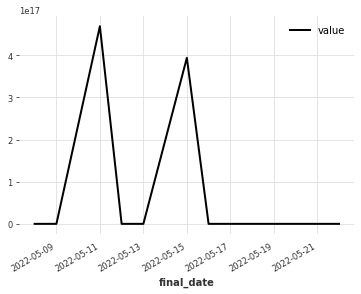

In [106]:
from darts import TimeSeries
final_data = TimeSeries.from_dataframe(data, 'final_date',fill_missing_dates=True, freq='D')
from darts.utils.missing_values import fill_missing_values
series = fill_missing_values(final_data , fill = 'auto')
series.plot()

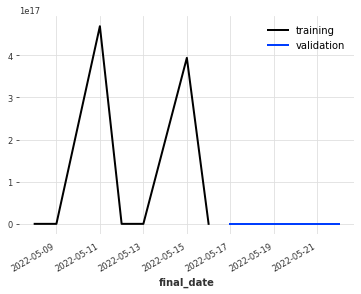

In [115]:
train, val = series.split_before(pd.Timestamp("2022-05-17"))
train.plot(label="training")
val.plot(label="validation")


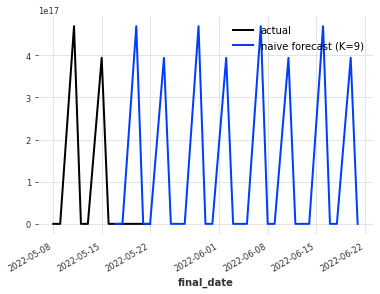

In [119]:
from darts.models import NaiveSeasonal

seasonal_model = NaiveSeasonal(K=9)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(36)

series.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=9)")

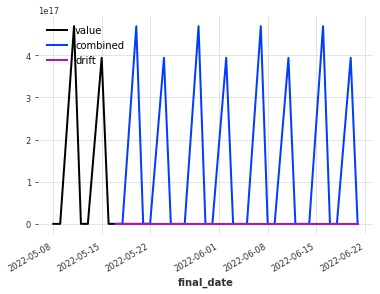

In [120]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(36)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

series.plot()
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift")

In [121]:
from darts.metrics import mape

print(
    "Mean absolute percentage error for the combined naive drift + seasonal: {:.2f}%.".format(
        mape(series, combined_forecast)
    )
)



Mean absolute percentage error for the combined naive drift + seasonal: 11877062040.61%.


In [123]:
from darts.models import Theta


def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))



eval_model(Theta())

model Theta(2) obtains MAPE: 16963742509.51%


C:\Users\selim\.conda\envs\final_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [124]:
## find best model parametrs

thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

C:\Users\selim\.conda\envs\final_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\selim\.conda\envs\final_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\selim\.conda\envs\final_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\selim\.conda\envs\final_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\selim\.conda\envs\final_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\selim\.conda\envs\final_env\lib\site

C:\Users\selim\.conda\envs\final_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\selim\.conda\envs\final_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\selim\.conda\envs\final_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
C:\Users\selim\.conda\envs\final_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [125]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(val, pred_best_theta), best_theta
    )
)

The MAPE is: 7947194027.30, with theta = 0.5714285714285712.


C:\Users\selim\.conda\envs\final_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


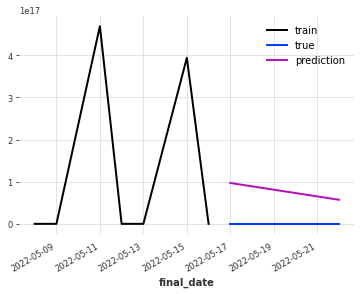

In [126]:
train.plot(label="train")
val.plot(label="true")
pred_best_theta.plot(label="prediction")

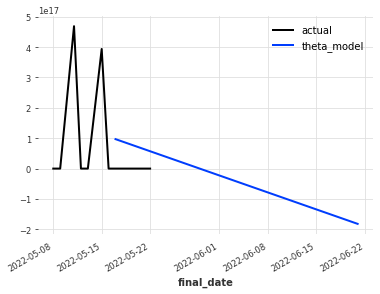

In [137]:
prediction = best_theta_model.predict(36)

series.plot(label="actual")
seasonal_forecast.plot(label="theta_model")

In [139]:
prediction  = prediction.pd_dataframe()
prediction

component,value
final_date,
2022-05-17,9.699998e+16
2022-05-18,8.902834e+16
2022-05-19,8.105671e+16
2022-05-20,7.308507e+16
2022-05-21,6.511344e+16
2022-05-22,5.714180e+16
2022-05-23,4.917017e+16
2022-05-24,4.119853e+16
2022-05-25,3.322690e+16


In [140]:
all_data = series.pd_dataframe()
all_data

component,value
final_date,
2022-05-08,8.246641e+08
2022-05-09,9.229435e+08
2022-05-10,2.344960e+17
2022-05-11,4.689920e+17
2022-05-12,7.072195e+08
2022-05-13,8.058839e+08
2022-05-14,1.969644e+17
2022-05-15,3.939287e+17
2022-05-16,8.313324e+08


In [141]:
prediction.to_csv("prediction_0.csv" , index = False)